# Clasificación con Regresíon Logístia
¿Qué es la Regresión Logística?
- Es un modelo que predice categorías binarias (0/1, Sí/No)
- Usa la función sigmoide para convertir una combinacion lineal en una de probabilidad entre 0 y 1

## Flujo de clasificación
1. Datos (X = features, y = etiquetas).
2. Entrenamiento del modelo con fit().
3. Predicción de clases con predict().
4. Predicción de probabilidades con predict_proba().
5. Evaluación com métricas (accuracy, matriz de confusión, precision, recal, F1).

## Ejemplo básico: Aprobado/Reprobado

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset simple
data = {
    "Horas": [1,2,3,4,5,6,7,8,9,10],
    "Aprobado": [0,0,0,0,1,1,1,1,1,1]
}
df = pd.DataFrame(data)

X = df[["Horas"]]
y = df["Aprobado"]

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# Modelo
modelo = LogisticRegression()
modelo.fit(X_train,y_train)

# Predicciones
y_pred = modelo.predict(X_test)
print("Predicciones: ", y_pred)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred))

Predicciones:  [1 0]
Accuracy: 1.0
Matriz de confusión:
 [[1 0]
 [0 1]]
Reporte:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Interpretacion:
- Accuracy: % de aciertos.
- Matriz de confucion:
[[TN FP]
[FN TP]]
- Precision, Recall, F1: Métricas más finas que accuracy

## Explicación de las métricas
- Accuracy = (Aciertos/Total).
- Presición = de lo que predije como positivos, ¿Cuantos eran realmente positivos?
- Recall(Sensibilidad) = de todos los positivos reales, ¿Cuantos detecte?
- F1-score = balance entre precision y recall (útil cuando hay clases desbalanceadas)

## Visualización de la curva sigmoide

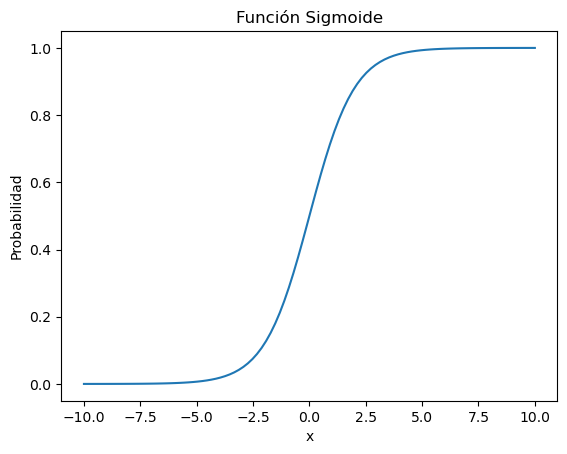

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
sigmoide = 1/(1+np.exp(-x))

plt.plot(x, sigmoide)
plt.title("Función Sigmoide")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.show()

La curva transforma valores lineales en probabilidades entre 0 y 1.

## Tarea
1. Crea un dataset con horas de estudio y si el alumno aprueba (1) o reprueba (0)
2. Entrena un modelo de Regresión Logística.
3. Calcula accuracy, matriz de confusión y reporte de clasificación.
4. Haz una predicción: ¿Qué pasa con un alumno que estudia 3 horas y otro que estudia 8 horas?
5. Gráfica la función sigmoide para interpretar el modelo.


Predicciones:  [1 1 1 1 0 1 0 1]
Accuracy: 1.0
Matriz de confusión:
 [[2 0]
 [0 6]]
Reporte:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Alumno que estudia 3 horas:  [0]
Alumno que estudia 8 horas:  [1]


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


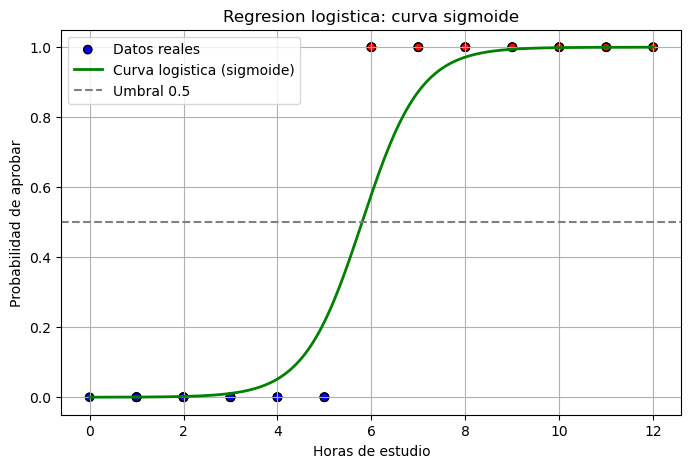

In [6]:
# 1.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = {
    "Horas": [1,1,2,1,3,2,4,3,2,1,
              5,4,6,5,7,6,8,7,9,8,
              10,9,11,10,12,11,10,12,9,8,
              7,6,5,4,3,2,1,0,2,3],
    "Aprueba": [0,0,0,0,0,0,0,0,0,0,   # 10 desaprobados (pocas horas)
                0,0,1,0,1,1,1,1,1,1,   # mezcla en la zona media
                1,1,1,1,1,1,1,1,1,1,   # 10 aprobados (muchas horas)
                1,1,0,0,0,0,0,0,0,0]   # algunos extras para balancear
}

df = pd.DataFrame(data)

# 2.

X = df[["Horas"]]
y = df["Aprueba"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print("Predicciones: ", y_pred)

# 3.

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred))

# 4.

print("Alumno que estudia 3 horas: ", modelo.predict([[3]]))
print("Alumno que estudia 8 horas: ", modelo.predict([[8]]))

# 5.

X_range = np.linspace(0,12,200).reshape(-1,1) # valores de horas de 0 a 12
y_prob = modelo.predict_proba(X_range)[:, 1] # probabilidad de aprobar

plt.figure(figsize=(8,5))
plt.scatter(X,y, c=y, cmap="bwr", edgecolors="k", label="Datos reales")
plt.plot(X_range, y_prob, color="green", linewidth=2, label="Curva logistica (sigmoide)")
plt.axhline(0.5, color="gray", linestyle="--", label="Umbral 0.5")
plt.xlabel("Horas de estudio")
plt.ylabel("Probabilidad de aprobar")
plt.title("Regresion logistica: curva sigmoide")
plt.legend()
plt.grid(True)
plt.show()